In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import decimal

In [2]:
data_p = pd.read_csv('FRB20180916B_polarization_results.csv')
print(data_p.columns)
new_event = {'burst_no':42,'event':200973875,'mjd':59552.211828,'snr':12.4,'dm_struct':'349.20(25)',
            'downsamp_fact':256,'fracpol_lin':'0.0(0)','freq_range':'400-600','rm_fdf':'0.0(0)',
            'rm_qu':'0.0(0)','rm_iono':0.0}
data_p = data_p.append(new_event, ignore_index = True)
data_p = data_p.sort_values(['event'])
print(data_p)

Index(['burst_no', 'event', 'mjd', 'snr', 'dm_struct', 'downsamp_fact',
       'fracpol_lin', 'freq_range', 'rm_fdf', 'rm_qu', 'rm_iono'],
      dtype='object')
    burst_no      event           mjd    snr     dm_struct  downsamp_fact  \
0          1   23789294  58477.161851   62.2   348.732(10)             32   
1          2   23891929  58478.155210   77.9   348.791(23)              8   
2          3   40363753  58638.716433  164.6   348.744(32)              8   
3          4   40750224  58639.705612   68.8    349.89(15)             64   
4          5   40750656  58639.710081   86.8   348.813(72)             64   
5          6   60073678  58786.320749   27.3    348.68(46)            256   
6          7   65395717  58835.173236   32.3    349.11(20)            256   
7          8   65511496  58836.171977   17.0  350.0527(75)            256   
8          9   67522832  58852.136284   16.7   349.847(83)            256   
9         10   67522901  58852.137732   43.9   349.097(61)           

In [6]:
eve = data_p['dm_struct'].to_numpy()
print(eve)

['348.732(10)' '348.791(23)' '348.744(32)' '349.89(15)' '348.813(72)'
 '348.68(46)' '349.11(20)' '350.0527(75)' '349.847(83)' '349.097(61)'
 '348.98(12)' '349.27(27)' '349.37(20)' '349.725(48)' '348.840(50)'
 '348.73(25)' '349.507(84)' '349.46(57)' '348.955(31)' '348.7917(55)'
 '350.12(34)' '348.99(13)' '348.8435(98)' '348.838(71)' '348.6885(20)'
 '349.47(31)' '349.542(51)' '348.83(45)' '348.988(20)' '349.60(17)'
 '348.93(37)' '348.95(34)' '348.97(21)' '349.38(14)' '348.8165(93)'
 '348.731(43)' '349.062(12)' '349.79(21)' '349.9(1.9)' '348.967(23)'
 '348.862(14)' '348.94(19)' '349.20(25)' '349.05(16)' '348.901(27)']


In [3]:
data = pd.read_csv('R3_data_pol_DM_no_dsamp.csv')
print(data)

e_main = data['Event_id'].to_numpy()
e_pol = data_p['event'].to_numpy()
print(data.columns)
#print(data_p.columns)

RM_FDF = []
RM_FDF_err = []

rm_fdf = data_p['rm_fdf'].to_numpy()
for i in range(len(rm_fdf)):
    r = float(rm_fdf[i].split('(')[0])
    RM_FDF.append(r)
    #print(r)
    e = float(rm_fdf[i].split('(')[1].split(')')[0])
    if e <= 4.0:
        RM_FDF_err.append(e)
        #print(e)
    else :
        RM_FDF_err.append(e/100)
        #print(e/100)
        
data_p['RM_FDF'] = RM_FDF
data_p['RM_FDF_err'] = RM_FDF_err


RM_QU = []
RM_QU_err = []

rm_qu = data_p['rm_qu'].to_numpy()
for i in range(len(rm_qu)):
    r = float(rm_qu[i].split('(')[0])
    RM_QU.append(r)
    #print(r)
    e = float(rm_qu[i].split('(')[1].split(')')[0])
    if e <= 6.0:
        RM_QU_err.append(e)
        #print(e)
    else :
        RM_QU_err.append(e/100)
        #print(e/100)
        
data_p['RM_QU'] = RM_QU
data_p['RM_FDF_QU'] = RM_QU_err

FRAC_POL = []
FRAC_POL_err = []

fpol = data_p['fracpol_lin'].to_numpy()
for i in range(len(fpol)):
    r = float(fpol[i].split('(')[0])
    FRAC_POL.append(r)
    #print(r)
    e = float(fpol[i].split('(')[1].split(')')[0])
    dec_point = decimal.Decimal(str(r))
    exp_point = dec_point.as_tuple().exponent
    e = e * 10**exp_point
    if e > 0.099:
        e = e/10
    FRAC_POL_err.append(float(e))
        #print(e)

        
data_p['F_POL'] = FRAC_POL
data_p['F_POL_err'] = FRAC_POL_err

print(data_p)




    Unnamed: 0   Event_id    DM_struc  Downsample  Scattering(s)  \
0           31   23789294  348.732000          32       0.000426   
1            0   23891929  348.791000          32       0.001385   
2           12   40363753  348.744000           1       0.003123   
3            7   40750224  349.890000          16       0.001099   
4           26   60073678  348.680000         512       0.000354   
5            5   65395717  349.110000         512       0.000799   
6           32   67522832  349.847000         256       0.002577   
7           16   67522901  349.097000          16       0.000793   
8           41   69509443  348.980000          32       0.000905   
9           29   71665813  349.270000         256       0.001408   
10          10   71784400  349.370000         256       0.003128   
11           3   71784833  349.725000          64       0.000658   
12          24   71785167  348.840000          64       0.000796   
13          23   73726599  348.730000         12

In [4]:
dm_err = [0.010, 0.023, 0.032, 0.15, 0.072, 0.46, 0.20, 
          0.0075, 0.083, 0.061, 0.12, 0.27, 0.20, 0.048,
         0.050, 0.25, 0.084, 0.57, 0.031, 0.0055, 0.34,
         0.13, 0.0098, 0.71, 0.0020, 0.31, 0.051, 0.45,
         0.020, 0.17, 0.37, 0.34, 0.21, 0.14, 0.0093,
         0.043, 0.012, 0.79, 1.9, 0.023, 0.014, 0.19, 0.25,
         0.16, 0.027]
data_p['Dm_err'] = dm_err
dm_err = np.array(dm_err).astype(float)
print(data_p)

    burst_no      event           mjd    snr     dm_struct  downsamp_fact  \
0          1   23789294  58477.161851   62.2   348.732(10)             32   
1          2   23891929  58478.155210   77.9   348.791(23)              8   
2          3   40363753  58638.716433  164.6   348.744(32)              8   
3          4   40750224  58639.705612   68.8    349.89(15)             64   
4          5   40750656  58639.710081   86.8   348.813(72)             64   
5          6   60073678  58786.320749   27.3    348.68(46)            256   
6          7   65395717  58835.173236   32.3    349.11(20)            256   
7          8   65511496  58836.171977   17.0  350.0527(75)            256   
8          9   67522832  58852.136284   16.7   349.847(83)            256   
9         10   67522901  58852.137732   43.9   349.097(61)             64   
10        11   69509443  58868.075857   40.5    348.98(12)            128   
11        12   71665813  58882.046806   16.9    349.27(27)            256   

In [8]:
e_morph = data['Event_id'].to_numpy()
e_pol = data_p['event'].to_numpy()
diff = np.setdiff1d(e_pol,e_morph)
print(diff)
for i in range(len(diff)):
    pos = np.where(e_pol == diff[i])
    print(pos[0][0])

data_p_mod = data_p.drop(labels=[4,7,20], axis = 0)
print(data_p_mod)

[ 40750656  65511496 135577833]
4
7
20
    burst_no      event           mjd    snr     dm_struct  downsamp_fact  \
0          1   23789294  58477.161851   62.2   348.732(10)             32   
1          2   23891929  58478.155210   77.9   348.791(23)              8   
2          3   40363753  58638.716433  164.6   348.744(32)              8   
3          4   40750224  58639.705612   68.8    349.89(15)             64   
5          6   60073678  58786.320749   27.3    348.68(46)            256   
6          7   65395717  58835.173236   32.3    349.11(20)            256   
8          9   67522832  58852.136284   16.7   349.847(83)            256   
9         10   67522901  58852.137732   43.9   349.097(61)             64   
10        11   69509443  58868.075857   40.5    348.98(12)            128   
11        12   71665813  58882.046806   16.9    349.27(27)            256   
12        13   71784400  58883.039950   32.5    349.37(20)            128   
13        14   71784833  58883.044053

In [10]:
print(data.columns)

Index(['Unnamed: 0', 'Event_id', 'DM_struc', 'Downsample', 'Scattering(s)',
       'Widths(s)', 'Width_err(s)', 'Sc_err(s)', 'dm_offset', 'dm_offset_err',
       'Drift_rate', 'Drift_rate_err', 'Peak_freq', 'Bandwidth', 'Center_Freq',
       'TOA', 'phase'],
      dtype='object')


In [21]:
dm = data['DM_struc'].to_numpy().astype(float)
dm_offset = data['dm_offset'].to_numpy().astype(float)
dm_combine = dm + dm_offset
dm_err = data_p_mod['Dm_err'].to_numpy().astype(float)
dm_offset_err = data['dm_offset_err'].to_numpy().astype(float)
dm_combine_err = dm_err + dm_offset_err
data_R3_BB = data[['Event_id','Downsample','Scattering(s)','Sc_err(s)','Widths(s)','Width_err(s)','Center_Freq',
                  'Bandwidth','TOA','phase']].copy()
data_R3_BB['DM_fitburst'] = dm_combine.tolist()
data_R3_BB['DM_err_fitburst'] = dm_combine_err.tolist()
data_R3_BB['Type_of_data'] = 'baseband'
print(data_R3_BB)
data_R3_BB.to_csv('R3_combine_baseband.csv')

     Event_id  Downsample  Scattering(s)     Sc_err(s)  \
0    23789294          32       0.000426  1.412008e-05   
1    23891929          32       0.001385  1.735240e-04   
2    40363753           1       0.003123  5.518003e-05   
3    40750224          16       0.001099  8.338553e-06   
4    60073678         512       0.000354  8.429720e-06   
5    65395717         512       0.000799  5.401473e-05   
6    67522832         256       0.002577  6.679313e-04   
7    67522901          16       0.000793  2.600485e-04   
8    69509443          32       0.000905  6.412463e-06   
9    71665813         256       0.001408  1.317877e-03   
10   71784400         256       0.003128  5.120184e-04   
11   71784833          64       0.000658  5.032287e-06   
12   71785167          64       0.000796  7.212518e-04   
13   73726599         128       0.000741  1.813866e-05   
14   83984528          32       0.000937  1.892158e-07   
15   84081108         512       0.000768  4.231661e-04   
16   92773515 

In [6]:
ref_mjd = 58369.40
period = 16.33
data['phase'] = ((data['TOA']-ref_mjd)/period)%1
print(data['phase'])

0     0.599011
1     0.659841
2     0.492127
3     0.552701
4     0.530971
5     0.522550
6     0.561316
7     0.561404
8     0.537407
9     0.392946
10    0.453763
11    0.454014
12    0.454606
13    0.431541
14    0.500099
15    0.561027
16    0.454554
17    0.515329
18    0.400752
19    0.377876
20    0.560563
21    0.561684
22    0.622678
23    0.515540
24    0.576397
25    0.637498
26    0.409069
27    0.400954
28    0.523381
29    0.538397
30    0.515018
31    0.576201
32    0.591381
33    0.591907
34    0.401080
35    0.416663
36    0.416699
37    0.416968
38    0.538194
39    0.431833
40    0.469850
41    0.530617
Name: phase, dtype: float64


[8.99064150e-05 1.53789625e-04 1.79857085e-04 1.97489033e-04
 2.71085136e-04 2.98642424e-04 3.02349093e-04 3.53822275e-04
 3.60620803e-04 4.25932517e-04 4.31799159e-04 4.97011979e-04
 5.56700006e-04 5.64846787e-04 6.35121486e-04 6.57713481e-04
 6.93996849e-04 7.41135314e-04 7.67640580e-04 7.92888233e-04
 7.95275018e-04 7.95633984e-04 7.98865447e-04 8.20426308e-04
 8.53451680e-04 8.67200886e-04 9.05266070e-04 9.27947629e-04
 9.37022600e-04 1.09936903e-03 1.13886479e-03 1.21288217e-03
 1.24349298e-03 1.38469199e-03 1.40801665e-03 1.49735588e-03
 1.51772109e-03 1.56477157e-03 2.57667430e-03 3.12347748e-03
 3.12782751e-03 3.50519439e-03]


<ipython-input-28-8480c08116f2>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


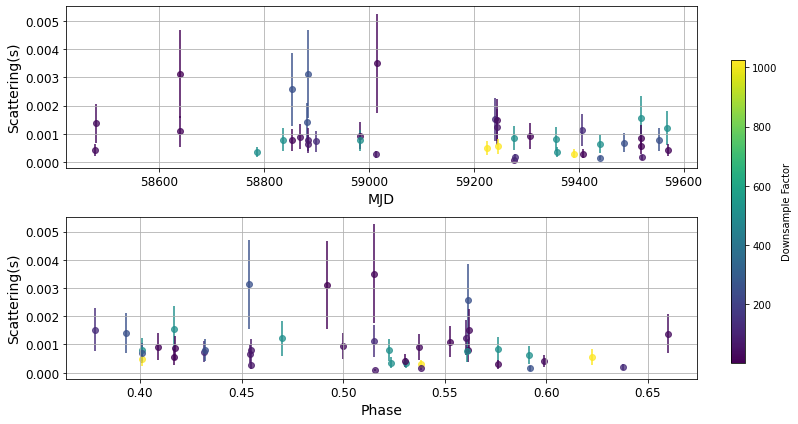

In [28]:
d = data['Downsample'].to_numpy().astype(int)
sc = data['Scattering(s)'].to_numpy().astype(float)
print(np.sort(sc))
sc_err = data['Sc_err(s)'].to_numpy().astype(float)
TOA = data['TOA'].to_numpy().astype(float)
phase = data['phase'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, e, color in zip(TOA, sc, sc*0.5, width_color):
    ax[0].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')

ax[0].set_ylabel("Scattering(s)", fontsize = 14)
ax[0].set_xlabel("MJD", fontsize = 14)
ax[0].grid()


for x, y, e, color in zip(phase, sc, sc*0.5, width_color):
    ax[1].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')


ax[1].set_ylabel("Scattering(s)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)
ax[1].grid()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("Scattering_2.jpeg", dpi = 300, bbox_inches = 'tight')

<ipython-input-29-658faba68c9f>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


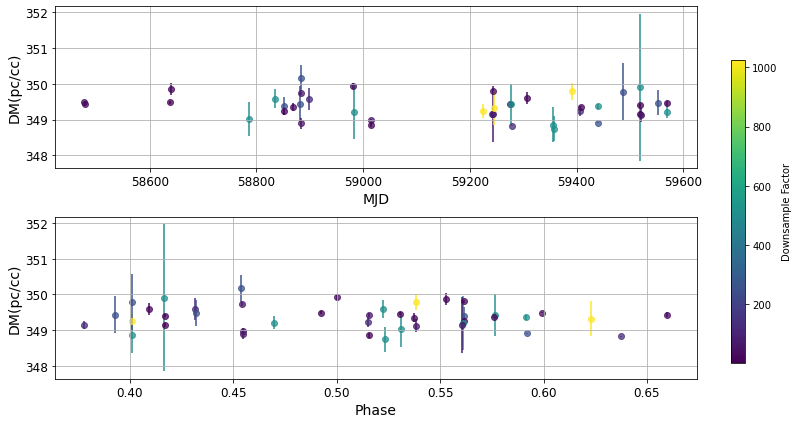

In [29]:
d = data['Downsample'].to_numpy().astype(int)
dm = data['DM_struc'].to_numpy().astype(float)
dm_offset = data['dm_offset'].to_numpy().astype(float)
dm = dm + dm_offset
dm_err = data_p_mod['Dm_err'].to_numpy().astype(float)
dm_offset_err = data['dm_offset_err'].to_numpy().astype(float)
dm_err = dm_err + dm_offset_err
TOA = data['TOA'].to_numpy().astype(float)
phase = data['phase'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, e, color in zip(TOA, dm, dm_err, width_color):
    ax[0].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')

ax[0].set_ylabel("DM(pc/cc)", fontsize = 14)
ax[0].set_xlabel("MJD", fontsize = 14)
ax[0].grid()


for x, y, e, color in zip(phase, dm, dm_err, width_color):
    ax[1].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')


ax[1].set_ylabel("DM(pc/cc)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)
ax[1].grid()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("DM.jpeg", dpi = 300, bbox_inches = 'tight')

<ipython-input-30-3f9aa57516e0>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


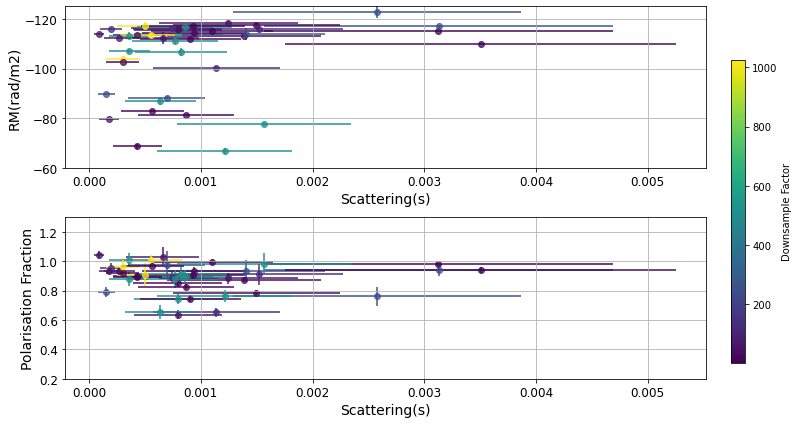

In [30]:
d = data['Downsample'].to_numpy().astype(int)
rm = data_p_mod['RM_FDF'].to_numpy().astype(float)
rm_i = data_p_mod['rm_iono'].to_numpy().astype(float)
rm = rm + rm_i
rm_err = data_p_mod['RM_FDF_err'].to_numpy().astype(float)
sc = data['Scattering(s)'].to_numpy().astype(float)
sc_err = data['Sc_err(s)'].to_numpy().astype(float)
f_pol = data_p_mod['F_POL'].to_numpy().astype(float)
f_pol_err = data_p_mod['F_POL_err'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, xe, ye, color in zip(sc, rm, sc*0.5, rm_err,width_color):
    ax[0].errorbar(x, y, xerr=xe, yerr=ye, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')

ax[0].set_ylim(-60,-125)
ax[0].set_ylabel("RM(rad/m2)", fontsize = 14)
ax[0].set_xlabel("Scattering(s)", fontsize = 14)
ax[0].grid()


for x, y, xe, ye, color in zip(sc, f_pol, sc*0.5, f_pol_err, width_color):
    ax[1].errorbar(x, y, xerr=xe, yerr=ye, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')


ax[1].set_ylim(0.2,1.3)
ax[1].set_ylabel("Polarisation Fraction", fontsize = 14)
ax[1].set_xlabel("Scattering(s)", fontsize = 14)
ax[1].grid()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("RM.jpeg", dpi = 300, bbox_inches = 'tight')

[8.99064150e-05 1.53789625e-04 1.79857085e-04 1.97489033e-04
 2.71085136e-04 2.98642424e-04 3.02349093e-04 3.53822275e-04
 3.60620803e-04 4.25932517e-04 4.31799159e-04 4.97011979e-04
 5.56700006e-04 5.64846787e-04 6.35121486e-04 6.57713481e-04
 6.93996849e-04 7.41135314e-04 7.67640580e-04 7.92888233e-04
 7.95275018e-04 7.95633984e-04 7.98865447e-04 8.20426308e-04
 8.53451680e-04 8.67200886e-04 9.05266070e-04 9.27947629e-04
 9.37022600e-04 1.09936903e-03 1.13886479e-03 1.21288217e-03
 1.24349298e-03 1.38469199e-03 1.40801665e-03 1.49735588e-03
 1.51772109e-03 1.56477157e-03 2.57667430e-03 3.12347748e-03
 3.12782751e-03 3.50519439e-03]


<ipython-input-12-1e5c18fe14c6>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


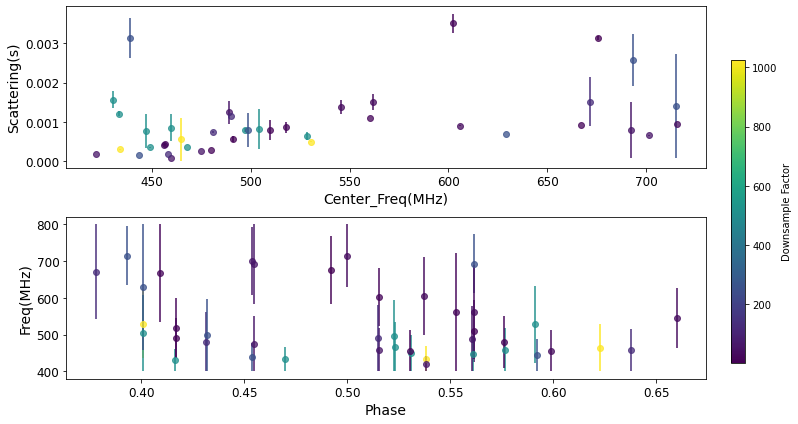

In [12]:
d = data['Downsample'].to_numpy().astype(int)
sc = data['Scattering(s)'].to_numpy().astype(float)
print(np.sort(sc))
sc_err = data['Sc_err(s)'].to_numpy().astype(float)
c_f = data['Center_Freq'].to_numpy().astype(float)
bw = data['Bandwidth'].to_numpy().astype(float)
bw = bw/2
phase = data['phase'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, e, color in zip(c_f, sc, sc_err, width_color):
    ax[0].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')

ax[0].set_ylabel("Scattering(s)", fontsize = 14)
ax[0].set_xlabel("Center_Freq(MHz)", fontsize = 14)


for x, y, e, color in zip(phase, c_f, bw, width_color):
    ax[1].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')


ax[1].set_ylabel("Freq(MHz)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("Freq.jpeg", dpi = 300, bbox_inches = 'tight')

In [22]:
width = data['Widths(s)'].to_numpy()
width_err = data['Width_err(s)'].to_numpy()
w = np.zeros(len(width))
w_err = np.zeros(len(width))
x26 = width[26][1:-1].split()
y26 = width_err[26][1:-1].split()
print(x26,y26)
for i in range(len(w)):
    x = width[i][1:-1].split()
    y = width_err[i][1:-1].split()
    print(x, y, i)
    if i == 3:
        w[i] = float(x[4])
        w_err[i] = float(y[4])
    elif i == 18:
        w[i] = float(x[1])
        w_err[i] = float(y[1])
    elif i == 26:
        w[i] = float(x[3])
        w_err[i] = float(0.0001)
    elif i == 30:
        w[i] = float(x[1])
        w_err[i] = float(0.0001)
    else:
        w[i] = float(x[0])
        try:
            w_err[i] = float(y[0])
        except:
            w_err[i] = float(0.0001)
print(w, w_err)    

['0.000664', '-0.00071772', '0.00141402', '0.00173612'] ['.']
['0.0040597'] ['5.63085193e-05'] 0
['0.00195324'] ['0.00011603'] 1
['0.0013133'] ['1.37074986e-05'] 2
['0.00069763', '0.00366548', '0.00251665', '0.00130234', '0.00276589', '0.00039469'] ['4.68460745e-04', '4.73343600e-02', '7.70259289e-05', '2.95982284e-03', '5.24160174e-05', '1.12116077e-03'] 3
['0.0044342'] ['0.000192'] 4
['0.00497873'] ['0.00013328'] 5
['0.00110157'] ['0.00017368'] 6
['0.00259151'] ['0.00019321'] 7
['0.00274308', '-2.26817175'] ['3.11596439e-05', '1.65105271e+06'] 8
['0.00125882'] ['0.00026502'] 9
['0.00374494'] ['0.00047109'] 10
['0.00188964'] ['2.35197468e-05'] 11
['1.20751296e-03', '1.77518954e+01'] ['1.53732326e-04', '4.00288921e+06'] 12
['0.00422479'] ['0.00013877'] 13
['0.00273444'] ['1.06654567e-06'] 14
['0.00386566'] ['0.00062079'] 15
['0.00403822'] ['1.66310173e-05'] 16
['0.00132326'] ['9.11301018e-05'] 17
['-2.62776649e+01', '2.73737243e-03'] ['3.25127769e+07', '1.15756775e-04'] 18
['0.00126861

[  0.  50. 100. 150. 200. 250. 300. 350. 400.]
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006 ]


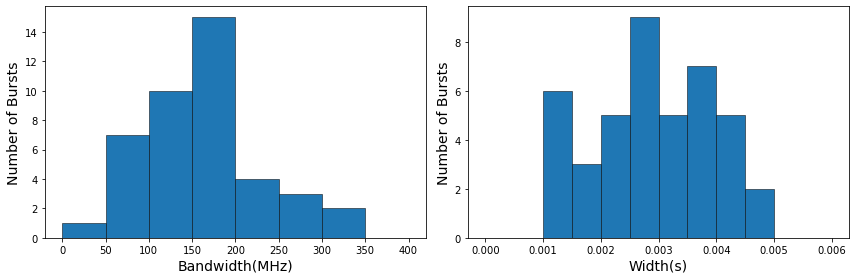

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
n1 = np.linspace(0,400,9)
print(n1)
ax[0].hist(data['Bandwidth'], bins=n1, density=False, edgecolor='black', linewidth = 0.5)
ax[0].set_xlabel("Bandwidth(MHz)", fontsize=14)
ax[0].set_ylabel("Number of Bursts", fontsize = 14)
n2 = np.linspace(0,0.006,13)
print(n2)
ax[1].hist(w, bins=n2, density=False, edgecolor='black', linewidth = 0.5)
ax[1].set_xlabel("Width(s)", fontsize=14)
ax[1].set_ylabel("Number of Bursts", fontsize = 14)
fig.tight_layout()
plt.savefig("Width_Bandwidth.jpeg", dpi = 300, bbox_inches = 'tight')

[0.0040597  0.00195324 0.0013133  0.00276589 0.0044342  0.00497873
 0.00110157 0.00259151 0.00274308 0.00125882 0.00374494 0.00188964
 0.00120751 0.00422479 0.00273444 0.00386566 0.00403822 0.00132326
 0.00273737 0.00126861 0.00297461 0.00205919 0.00347452 0.00395498
 0.00344953 0.00316826 0.00173612 0.00253168 0.0036107  0.00482246
 0.00279214 0.00319175 0.00221009 0.00384078 0.0021688  0.00368778
 0.00257097 0.0022043  0.00444121 0.00241031 0.0039431  0.00348242] [5.63085193e-05 1.16030000e-04 1.37074986e-05 5.24160174e-05
 1.92000000e-04 1.33280000e-04 1.73680000e-04 1.93210000e-04
 3.11596439e-05 2.65020000e-04 4.71090000e-04 2.35197468e-05
 1.53732326e-04 1.38770000e-04 1.06654567e-06 6.20790000e-04
 1.66310173e-05 9.11301018e-05 1.15756775e-04 1.76760000e-04
 2.89290000e-04 1.28780000e-04 5.92000000e-04 1.00000000e-04
 4.39410000e-04 5.59747965e-06 1.00000000e-04 4.54240000e-04
 4.14196367e-07 2.20440000e-04 1.00000000e-04 1.87355943e-06
 1.32980000e-04 2.18660080e-05 8.27471028e

<ipython-input-29-f0e70b1a0930>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


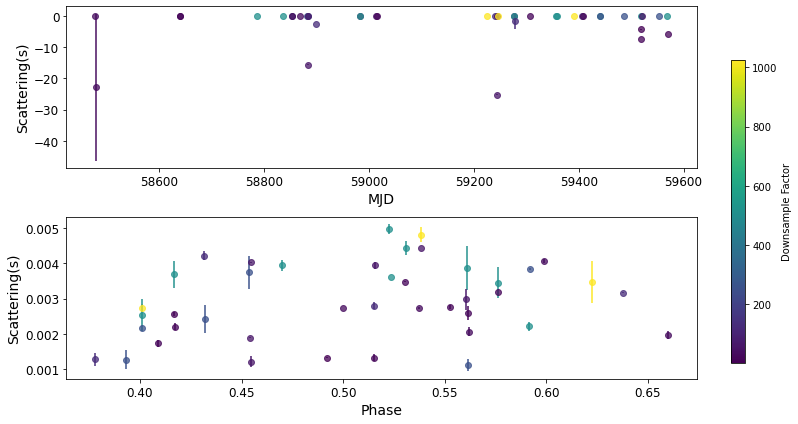

In [29]:
d = data['Downsample'].to_numpy().astype(int)
d_rate = data['Drift_rate'].to_numpy().astype(float)
#print(np.sort(sc))
d_rate_err = data['Drift_rate_err'].to_numpy().astype(float)
TOA = data['TOA'].to_numpy().astype(float)
phase = data['phase'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, e, color in zip(TOA, d_rate, d_rate_err, width_color):
    ax[0].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')

ax[0].set_ylabel("Scattering(s)", fontsize = 14)
ax[0].set_xlabel("MJD", fontsize = 14)

print(w, w_err)
for x, y, e, color in zip(phase, w, w_err, width_color):
    ax[1].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = 'o')


ax[1].set_ylabel("Scattering(s)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
#plt.savefig("Scattering.jpeg", dpi = 300, bbox_inches = 'tight')

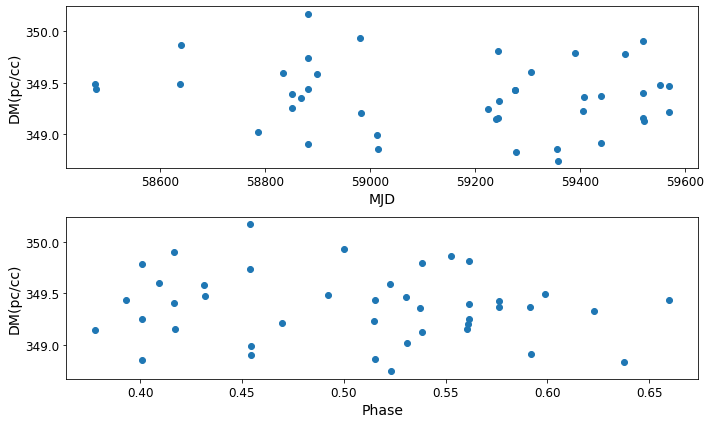

In [79]:
fig, ax = plt.subplots(2, 1, figsize = (10,6))


ax[0].errorbar(data['TOA'],data['DM_struc']+data['dm_offset'],yerr=data['dm_offset_err'].astype(int), 
             linestyle = '', marker ='o')
ax[0].set_ylabel("DM(pc/cc)", fontsize = 14)
ax[0].set_xlabel("MJD", fontsize = 14)

ax[1].errorbar(data['phase'],data['DM_struc']+data['dm_offset'],yerr=data['dm_offset_err'].astype(int), 
             linestyle = '', marker ='o')
ax[1].set_ylabel("DM(pc/cc)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("DM.jpg", bbox_inches ='tight', dpi=300)

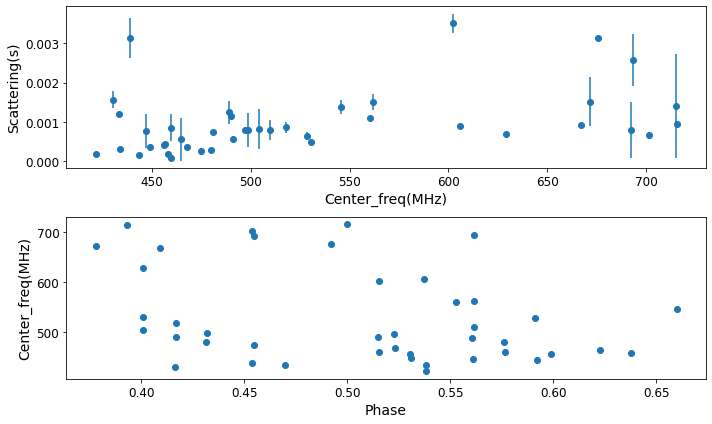

In [80]:
fig, ax = plt.subplots(2, 1, figsize = (10,6))

ax[0].errorbar(data['Center_freq'],data['Scattering(s)'], yerr=data['Sc_err(s)'], linestyle = '', marker ='o')

ax[0].set_ylabel("Scattering(s)", fontsize = 14)
ax[0].set_xlabel("Center_freq(MHz)", fontsize = 14)


ax[1].scatter(data['phase'],data['Center_freq'], marker ='o')

ax[1].set_ylabel("Center_freq(MHz)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig("Freq.jpg", bbox_inches ='tight', dpi=300)

In [3]:
lofar = 46.55e-3
lofar_freq = 150
chime_freq = 600


chime = lofar * (600 / 150) ** -4.
print(chime)

0.0001818359375
